<a href="https://colab.research.google.com/github/Sma126/Dataset_G10/blob/main/Dataset_G10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv("CrimesOnWomenData.csv")

df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


In [5]:
df.describe()

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [30]:
# Convertir los estados a letras mayusculas
df['State'] = df['State'].str.upper()

# Agrupación según el estado y la suma de los crimenes de cada uno

df_estandar = df.groupby(['State', 'Year'])[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum().reset_index()

# Muestra el dataframe
display(df_estandar.head())

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,A & N ISLANDS,2001,3,2,0,19,1,9,0
1,A & N ISLANDS,2002,2,1,0,17,3,4,0
2,A & N ISLANDS,2003,2,2,0,9,2,7,0
3,A & N ISLANDS,2004,10,3,0,6,3,5,0
4,A & N ISLANDS,2005,4,1,0,11,1,5,0


In [14]:
# Se agrupa el dataframe principal segun el grupo y se obtiene el promedio de crimenes
df.groupby(["Year"])["Rape"].mean()

,Rape
Year,
2001,461.588235
2002,469.705882
2003,451.676471
2004,520.058824
2005,520.617647
2006,550.735294
2007,592.323529
2008,617.676471
2009,615.529412


In [15]:
# Se agrupa el dataframe estandarizado segun el estado y cuenta de crimenes
df_estandar.groupby(["State"])[["Rape"]].mean()

,Rape
State,
A & N ISLANDS,424.0
ANDHRA PRADESH,23424.0
ARUNACHAL PRADESH,1153.0
ASSAM,32190.0
BIHAR,21006.0
CHANDIGARH,795.0
CHHATTISGARH,25178.0
D & N HAVELI,49.0
D&N HAVELI,2294.0


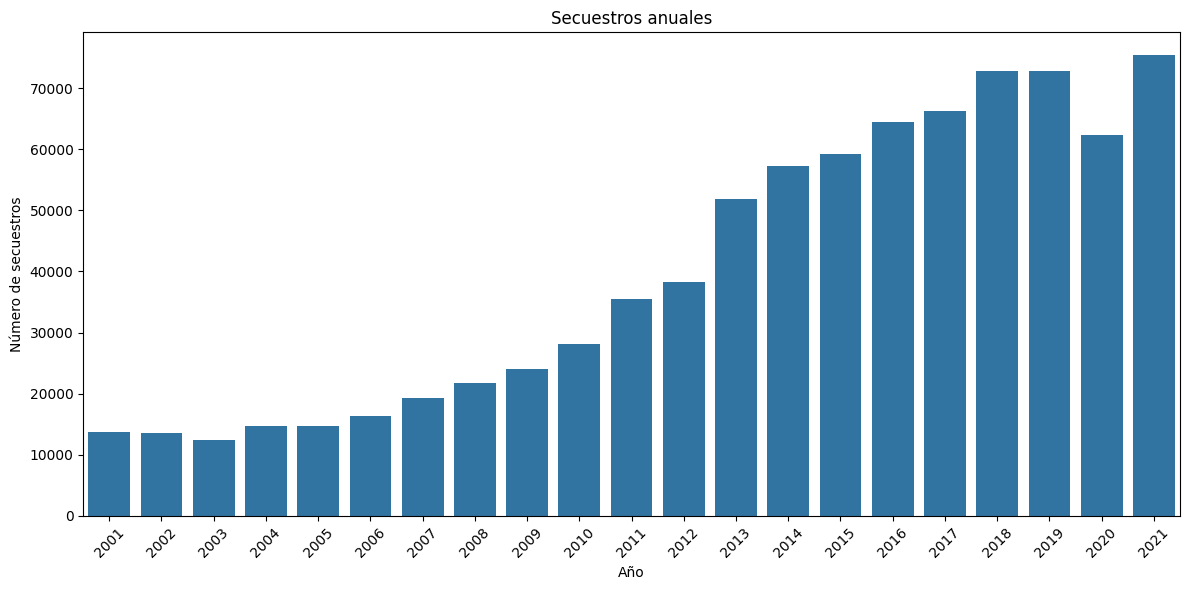

In [33]:
# Se agrupa el dataframe por año y numero de crimenes
secuestros_anuales = df_estandar.groupby("Year")['K&A'].sum().reset_index()

# Se realiza una gráfica de barras para mostrar el dataframe
plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="K&A", data=secuestros_anuales)
plt.title("Secuestros anuales")
plt.xlabel("Año")
plt.ylabel("Número de secuestros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

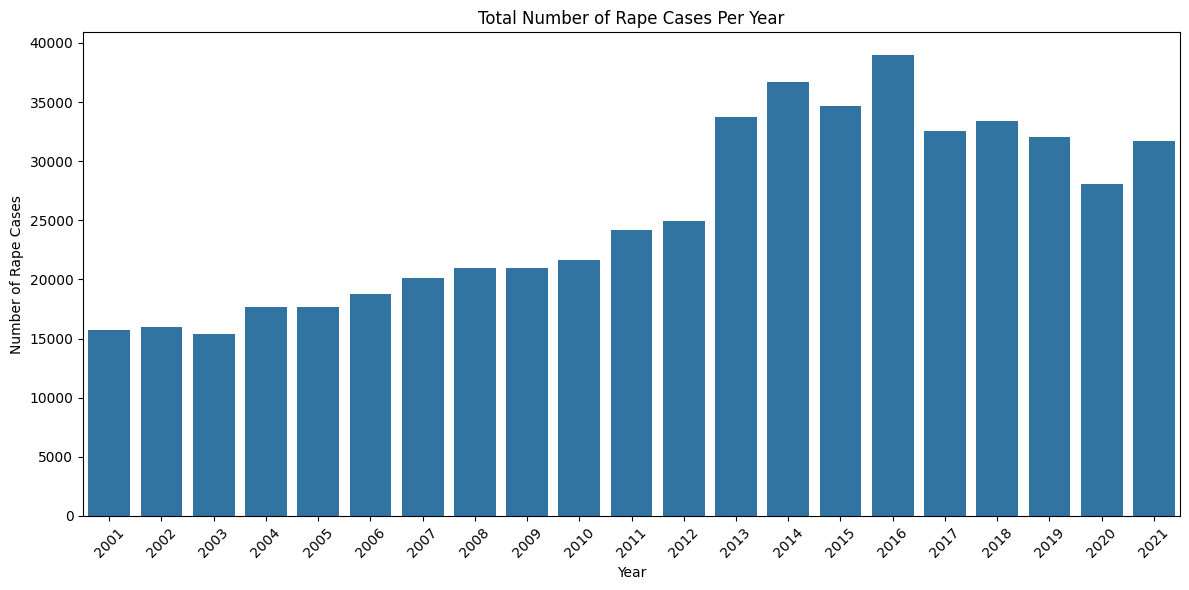

In [34]:
# Se realiza una agrupación de crimenes por año
Vcasos_anuales = df_estandar.groupby('Year')['Rape'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Rape', data=Vcasos_anuales)
plt.title('Total Number of Rape Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Rape Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

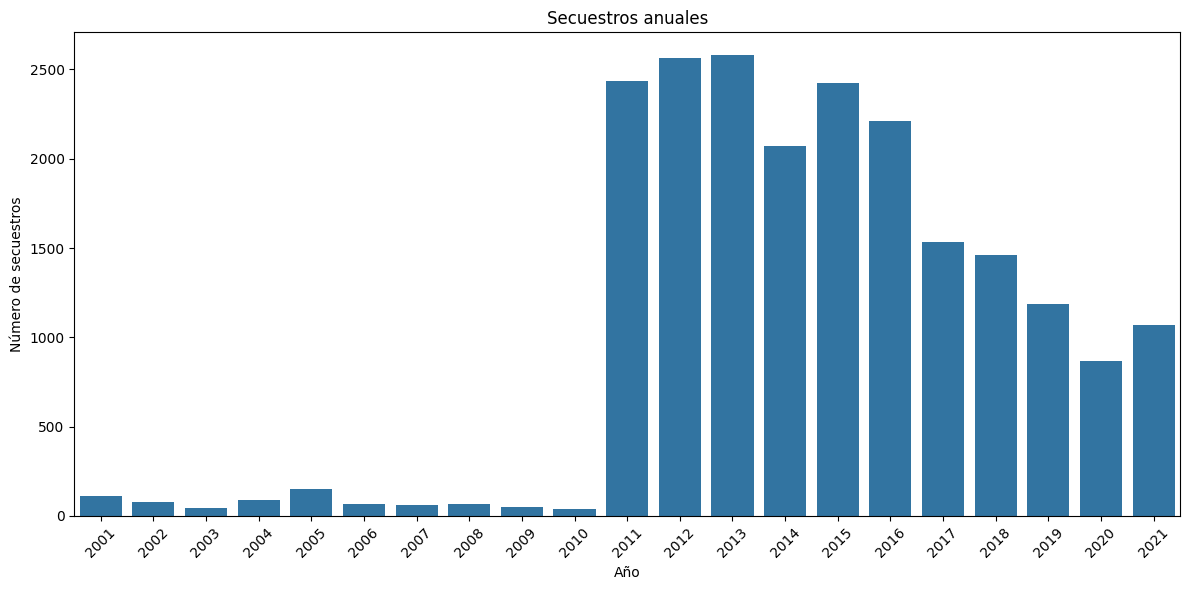

In [36]:
trafico = df_estandar.groupby("Year")['WT'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="WT", data=trafico)
plt.title("Secuestros anuales")
plt.xlabel("Año")
plt.ylabel("Número de secuestros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
from plotly.subplots import make_subplots

violencia_domestica = df_estandar.groupby("Year")['DV'].sum().reset_index()
asalto = df_estandar.groupby("Year")['AoW'].sum().reset_index()

aow_2010 = asalto[asalto['Year'] == 2010]['AoW'].iloc[0]
aow_2012 = asalto[asalto['Year'] == 2012]['AoW'].iloc[0]
promedio_aow = (aow_2010 + aow_2012) / 2
asalto.loc[asalto['Year'] == 2011, 'AoW'] = promedio_aow


muertes = df_estandar.groupby("Year")['DD'].sum().reset_index()

fig = make_subplots(rows=6, cols=1, subplot_titles=("Casos de violación por año",
                                                    "Secuestros anuales",
                                                    "Trafico anual",
                                                    "Casos de Violencia Domestica por año",
                                                    "Asalto contra mujeres por año",
                                                    "Muertes provocadas por año"))

fig.add_trace(go.Bar(x=Vcasos_anuales["Year"], y=Vcasos_anuales["Rape"], marker_color='darkgray', name='Violaciones'), row=1, col=1)
fig.add_trace(go.Bar(x=secuestros_anuales["Year"], y=secuestros_anuales["K&A"], marker_color='darkred', name='Secuestro'), row=2, col=1)
fig.add_trace(go.Bar(x=trafico["Year"], y=trafico["WT"], marker_color='darksalmon', name='Trafico de Mujeres'), row=3, col=1)
fig.add_trace(go.Bar(x=violencia_domestica["Year"], y=violencia_domestica["DV"], marker_color='darkseagreen', name='Violencia Domestica'), row=4, col=1)
fig.add_trace(go.Bar(x=asalto["Year"], y=asalto["AoW"], marker_color='darkgreen', name='Asalto'), row=5, col=1)
fig.add_trace(go.Bar(x=muertes["Year"], y=muertes["DD"], marker_color='darkblue', name='Muertes provocadas'), row=6, col=1)

fig.update_legends()
fig.update_layout(height=800, title_text="Crimenes contra las Mujeres en India")
fig.show()

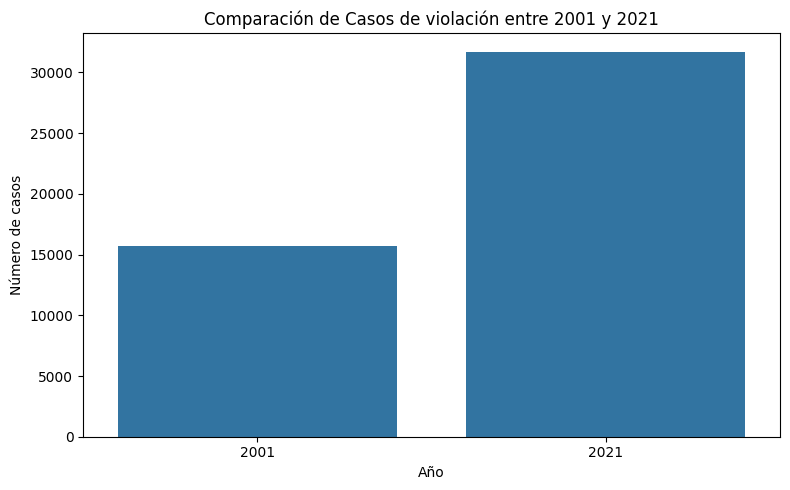

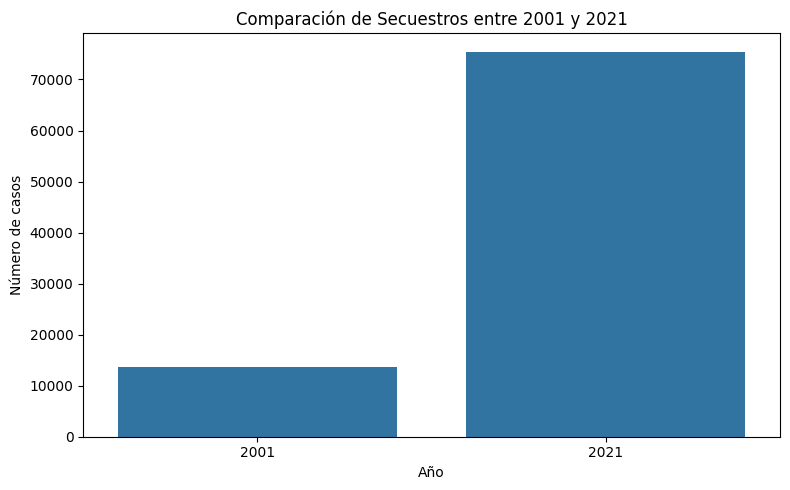

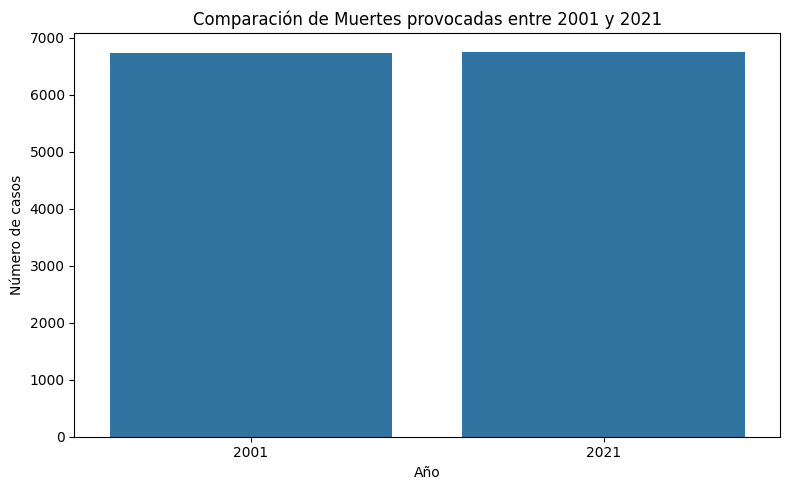

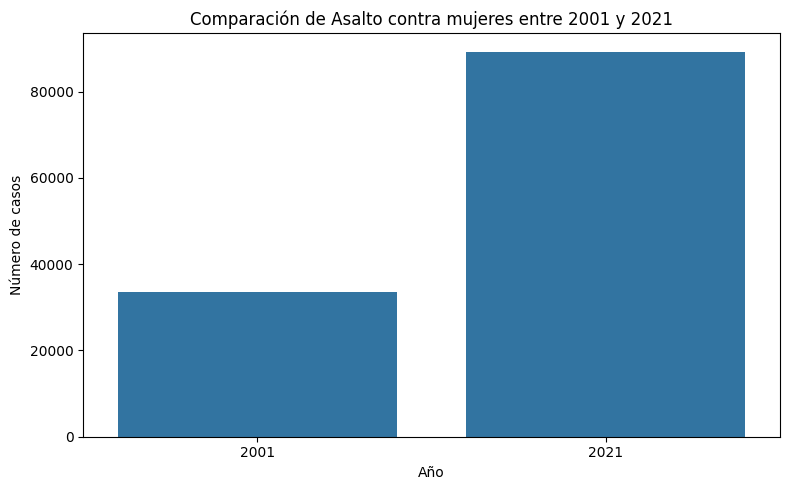

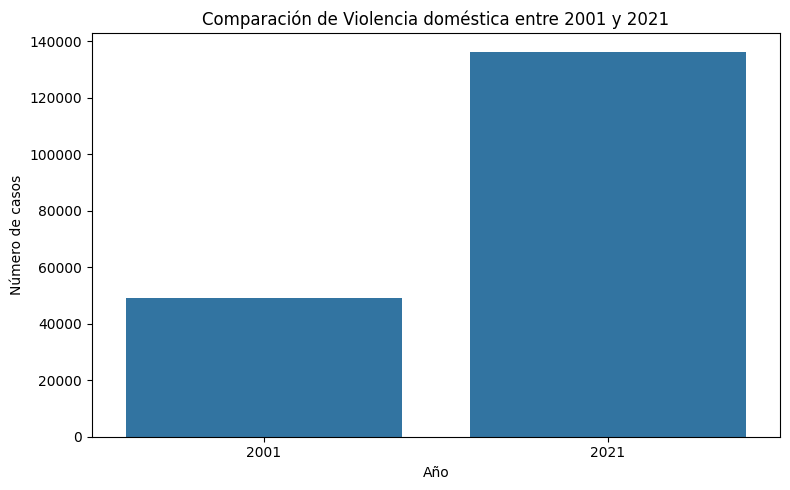

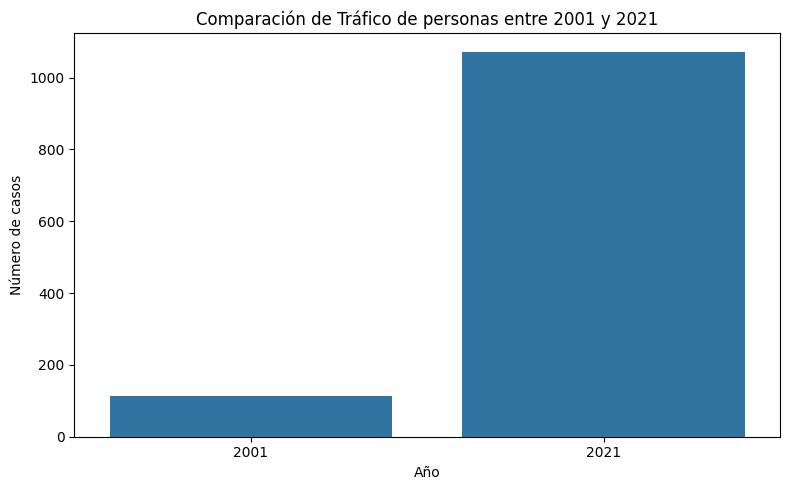

In [45]:
crime_types = ['Rape', 'K&A', 'DD', 'AoW', 'DV', 'WT']
crime_titles = {
    'Rape': 'Casos de violación',
    'K&A': 'Secuestros',
    'DD': 'Muertes provocadas',
    'AoW': 'Asalto contra mujeres',
    'DV': 'Violencia doméstica',
    'WT': 'Tráfico de personas'
}

oldest_year = df_estandar['Year'].min()
most_recent_year = df_estandar['Year'].max()

for crime in crime_types:
    crime_data = df_estandar.groupby('Year')[crime].sum().reset_index()
    compare_years_data = crime_data[crime_data['Year'].isin([oldest_year, most_recent_year])]

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Year', y=crime, data=compare_years_data)
    plt.title(f'Comparación de {crime_titles[crime]} entre {oldest_year} y {most_recent_year}')
    plt.xlabel('Año')
    plt.ylabel('Número de casos')
    plt.xticks([0, 1], [oldest_year, most_recent_year])
    plt.tight_layout()
    plt.show()

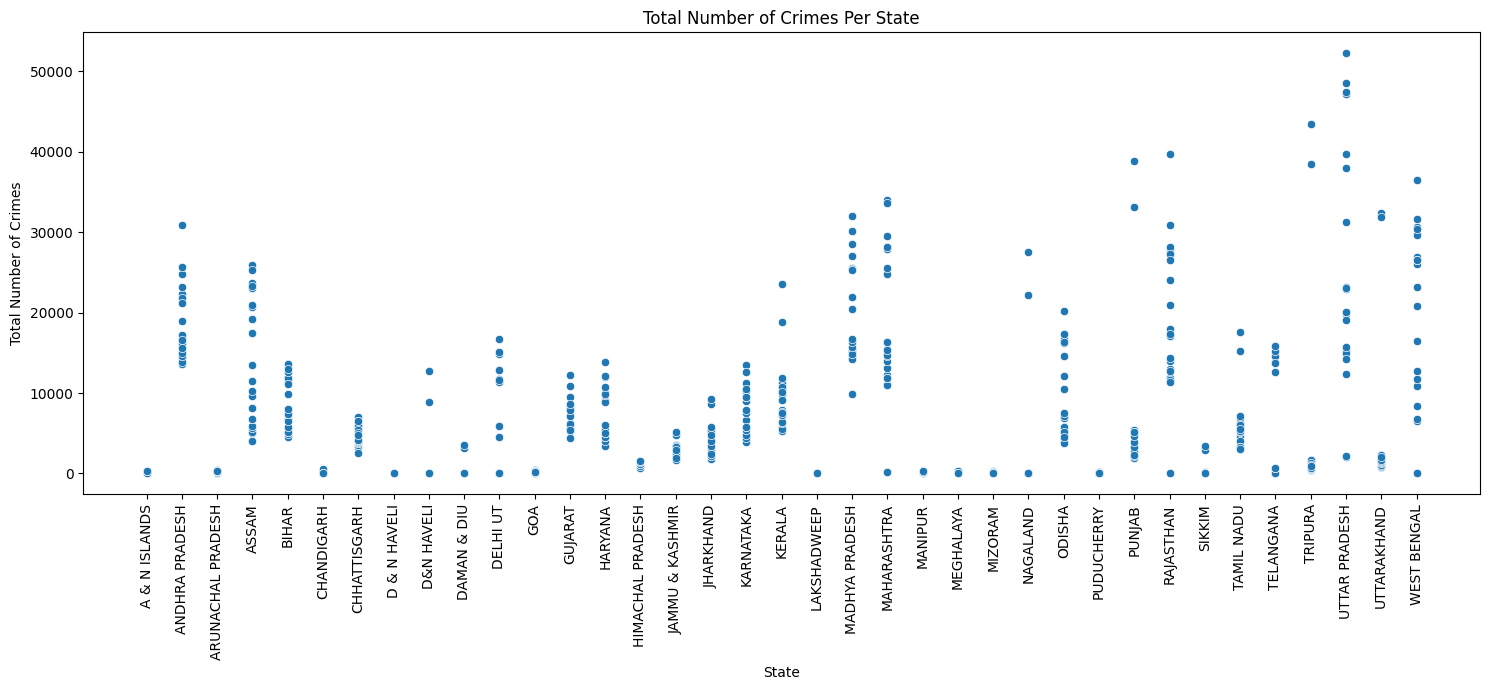

In [48]:
# Calculate the total number of crimes for each state
df_estandar['Crimenes'] = df_estandar[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

# Create the scatter plot
plt.figure(figsize=(15, 7))
sns.scatterplot(x='State', y='Crimenes', data=df_estandar)
plt.title('Total Number of Crimes Per State')
plt.xlabel('State')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

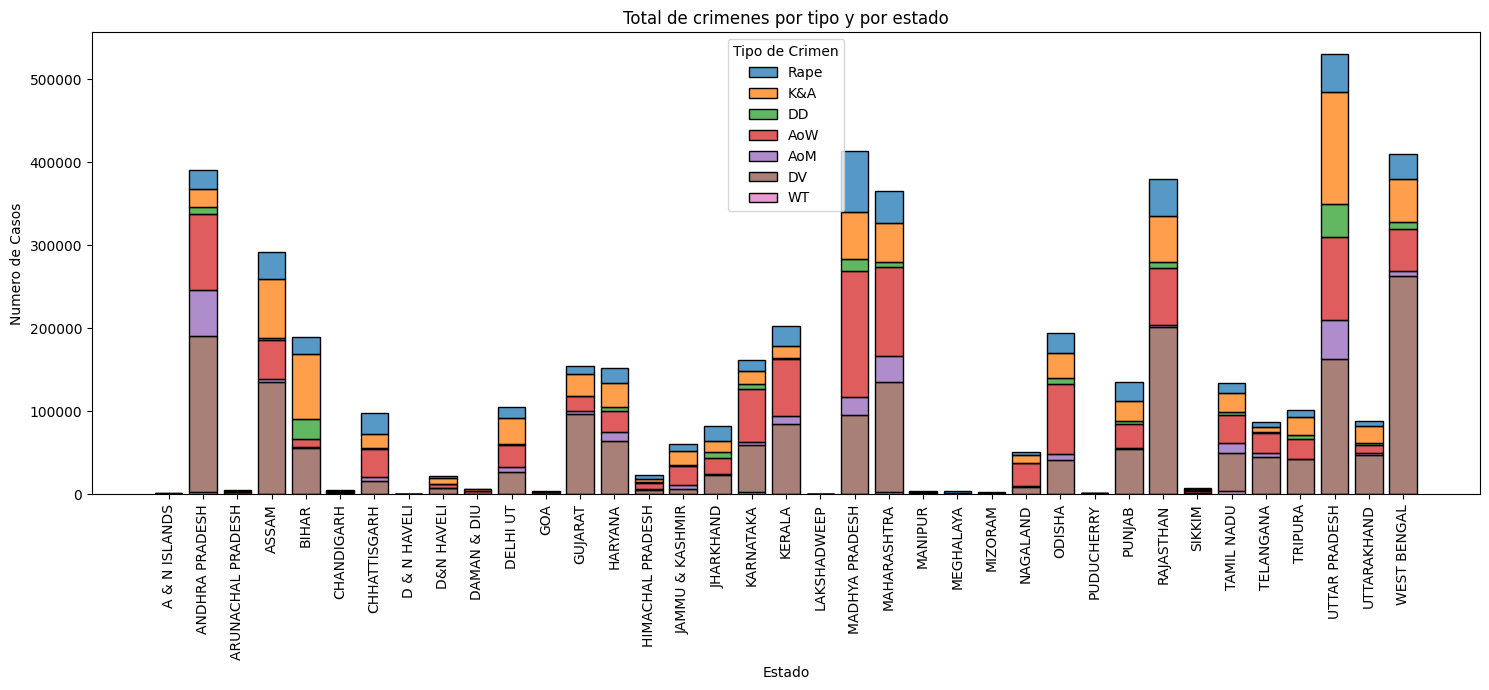

In [53]:
# Expandi el dataframe para una mejor graficación
df_expandido = df_estandar.melt(
    id_vars='State',
    value_vars=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
    var_name='Tipo de Crimen',
    value_name='Numero de Casos'
)

plt.figure(figsize=(15, 7))
sns.histplot(data=df_expandido, x='State', weights='Numero de Casos', hue='Tipo de Crimen', multiple='stack', shrink=0.8)
plt.title('Total de crimenes por tipo y por estado')
plt.xlabel('Estado')
plt.ylabel('Numero de Casos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

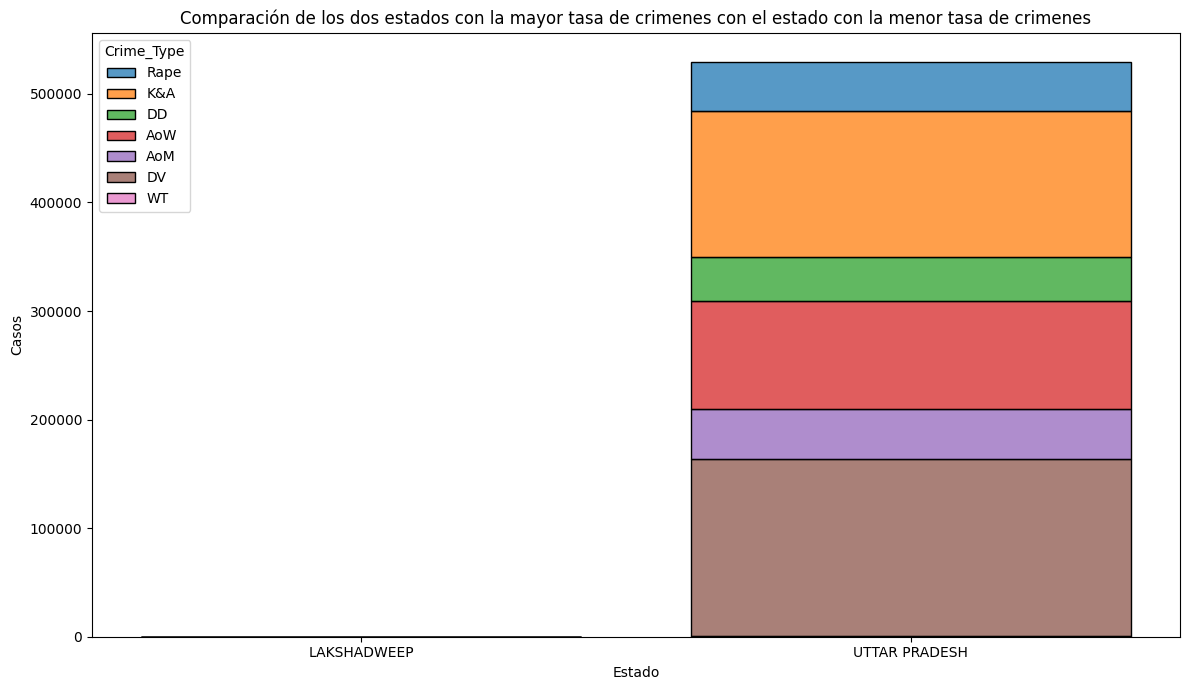

In [59]:
df_estandar['Total']=df_estandar[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

max = df_estandar.nlargest(2, 'Total')
min = df_estandar.nsmallest(1, 'Total')

comparacion = pd.concat([max, min])

df_comparacion = df_estandar[df_estandar['State'].isin(comparacion['State'])]

comparacion_expandida = df_comparacion.melt(
    id_vars='State',
    value_vars=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
    var_name='Crime_Type',
    value_name='Number_of_Cases'
)

plt.figure(figsize=(12, 7))
sns.histplot(data=comparacion_expandida, x='State', weights='Number_of_Cases', hue='Crime_Type', multiple='stack', shrink=0.8)
plt.title('Comparación de los dos estados con la mayor tasa de crimenes con el estado con la menor tasa de crimenes')
plt.xlabel('Estado')
plt.ylabel('Casos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

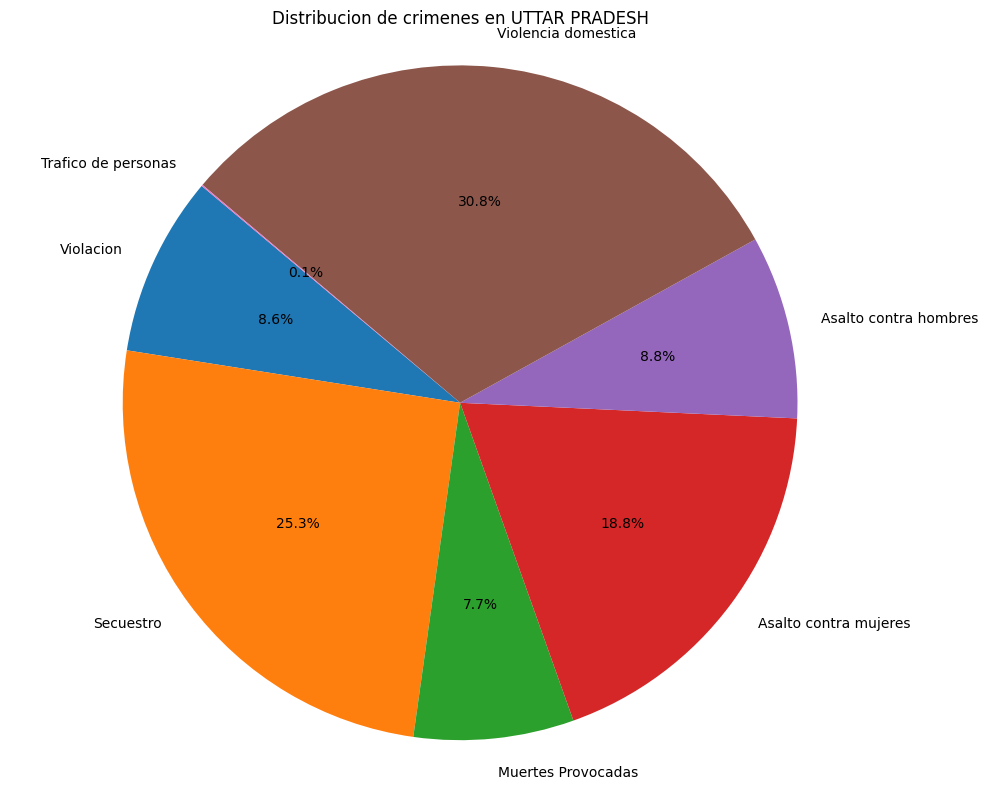

In [63]:
# Filtrar los datos para el estado UTTAR PRADESH
uttar = df_estandar[df_estandar['State'] == 'UTTAR PRADESH']

# Sumar los crímenes para todos los años para UTTAR PRADESH
uttar_data = uttar[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum().reset_index()
uttar_data.columns = ['Crime_Type', 'Number_of_Cases']

casos = ['Violacion', 'Secuestro', 'Muertes Provocadas', 'Asalto contra mujeres', 'Asalto contra hombres', 'Violencia domestica', 'Trafico de personas']

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.pie(uttar_data['Number_of_Cases'], labels=casos, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion de crimenes en UTTAR PRADESH')
plt.axis('equal')
plt.tight_layout()
plt.show()